In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data=pd.read_csv('/home/ayush/Desktop/DAI/dirty_mobiles_dataset.csv')
data

Company Name             Model Name Mobile Weight  RAM Front Camera  \
0          Apple        iPhone 16 128GB          174g  6GB         12MP   
1          Apple        iPhone 16 256GB          174g  6GB         12MP   
2          Apple        iPhone 16 512GB          174g  6GB         12MP   
3          Apple   iPhone 16 Plus 128GB          203g  6GB         12MP   
4          Apple   iPhone 16 Plus 256GB          203g  6GB         12MP   
..           ...                    ...           ...  ...          ...   
930         Vivo              V15 128GB          190g  6GB         32MP   
931        Tecno  Phantom V Flip2 256GB          195g  8GB         32MP   
932         POCO               F4 128GB          195g  6GB         20MP   
933       Realme      Narzo 70 5G 128GB          198g  8GB         16MP   
934         POCO            F3 GT 128GB          205g  6GB         16MP   

    Back Camera                Processor Battery Capacity  Screen Size  \
0          48MP               A17 Bionic         3,600mAh   6.1 inches   
1          48MP               A17 Bionic         3,600mAh   6.1 inches   
2          48MP               A17 Bionic         3,600mAh   6.1 inches   
3          48MP               A17 Bionic         4,200mAh   6.7 inches   
4          48MP               A17 Bionic         4,200mAh   6.7 inches   
..          ...                      ...              ...          ...   
930        48MP       MediaTek Helio P70          4000mAh  6.53 inches   
931        50MP  MediaTek Dimensity 8050         4,300mAh   6.9 inches   
932        64MP           Snapdragon 870          4500mAh  6.67 inches   
933  50MP + 2MP   MediaTek Dimensity 810         5,200mAh   6.6 inches   
934        64MP  MediaTek Dimensity 1200          5065mAh  6.67 inches   

    Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0                 PKR 224,999             INR 79,999              CNY 5,799   
1                 PKR 234,999             INR 84,999              CNY 6,099   
2                 PKR 244,999             INR 89,999              CNY 6,499   
3                 PKR 249,999             INR 89,999              CNY 6,199   
4                 PKR 259,999             INR 94,999              CNY 6,499   
..                        ...                    ...                    ...   
930                PKR 34,999             INR 22,990              CNY 2,199   
931               PKR 159,999             INR 79,999              CNY 5,999   
932                PKR 74,999             INR 27,999              CNY 2,399   
933                PKR 52,999             INR 19,499              CNY 1,600   
934                PKR 79,999             INR 25,999              CNY 2,299   

    Launched Price (USA) Launched Price (Dubai)  Launched Year  
0                USD 799              AED 2,799           2024  
1                USD 849              AED 2,999           2024  
2                USD 899              AED 3,199           2024  
3                USD 899              AED 3,199           2024  
4                USD 949              AED 3,399           2024  
..                   ...                    ...            ...  
930              USD 299              AED 1,099           2019  
931              USD 999              AED 3,999           2024  
932              USD 349              AED 1,399           2022  
933              USD 230                AED 830           2024  
934              USD 399              AED 1,499           2021  

[935 rows x 15 columns]

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               935 non-null    object
 1   Model Name                 935 non-null    object
 2   Mobile Weight              935 non-null    object
 3   RAM                        925 non-null    object
 4   Front Camera               935 non-null    object
 5   Back Camera                935 non-null    object
 6   Processor                  935 non-null    object
 7   Battery Capacity           925 non-null    object
 8   Screen Size                925 non-null    object
 9   Launched Price (Pakistan)  935 non-null    object
 10  Launched Price (India)     925 non-null    object
 11  Launched Price (China)     935 non-null    object
 12  Launched Price (USA)       935 non-null    object
 13  Launched Price (Dubai)     935 non-null    object
 14  Launched Y

In [195]:
# Categorical and Numerical Data
categorical_cols = ['Company Name', 'Model Name', 'Processor']
numeric_cols = ['RAM', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)','Launched Price (India)', 
                'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

In [197]:
# Finding missing values
data.isna().sum()
# data.duplicated().sum()

Company Name                  0
Model Name                    0
Mobile Weight                 0
RAM                          10
Front Camera                  0
Back Camera                   0
Processor                     0
Battery Capacity             10
Screen Size                  10
Launched Price (Pakistan)     0
Launched Price (India)       10
Launched Price (China)        0
Launched Price (USA)          0
Launched Price (Dubai)        0
Launched Year                 0
dtype: int64

In [199]:
# RAM, Battery Capacity,Screen Size and Launched Price (India) contain missing values
# Handling Missing Values

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
for col in numeric_cols:
    data[col] = data[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

In [201]:
data.duplicated().sum()

19

In [215]:
# drop duplicate data
df=data.drop_duplicates()
df=df.copy()

In [219]:
# Detect and treat outliers using IQR

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    df[column].fillna(df[column].median(), inplace=True)

In [221]:
# Standardize categorical values
df['Company Name'] = df['Company Name'].str.strip().str.title()
df['Processor'] = df['Processor'].str.upper()

In [229]:
# Cleaned CSV data

df.to_csv("cleaned_mobiles_dataset.csv", index=False)
print("\nData cleaning complete. Cleaned dataset saved as 'cleaned_mobiles_dataset.csv in the working directory'.")


Data cleaning complete. Cleaned dataset saved as 'cleaned_mobiles_dataset.csv in the working directory'.


<font size="6">EDA</font>


<font size="4">UNIVARIATE ANALYSIS</font>


Summary Statistics:
              RAM  Battery Capacity  Screen Size  Launched Price (Pakistan)  \
count  916.000000        916.000000   916.000000                 916.000000   
mean     6.255459       4827.808952     6.642969              108204.250000   
std      1.496160        355.171089     0.120668               74808.374958   
min      3.000000       3750.000000     6.280000               15999.000000   
25%      6.000000       4520.000000     6.580000               54999.000000   
50%      6.000000       5000.000000     6.670000               84999.000000   
75%      8.000000       5000.000000     6.700000              150000.000000   
max     10.000000       5700.000000     6.950000              339999.000000   

       Launched Price (India)  Launched Price (China)  Launched Price (USA)  \
count              916.000000              916.000000            916.000000   
mean             46767.218341             3613.850437            547.653559   
std              33539.241099  

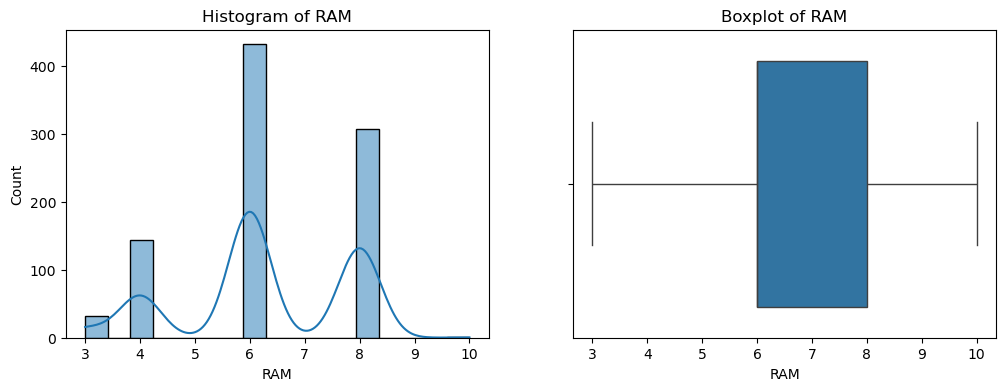

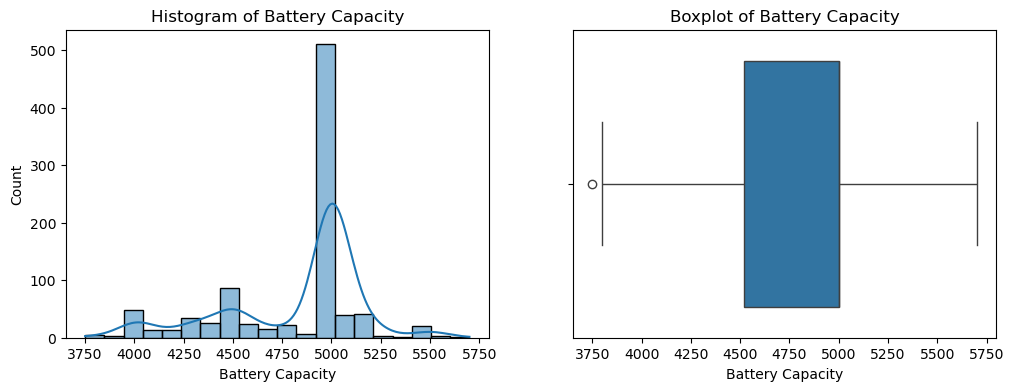

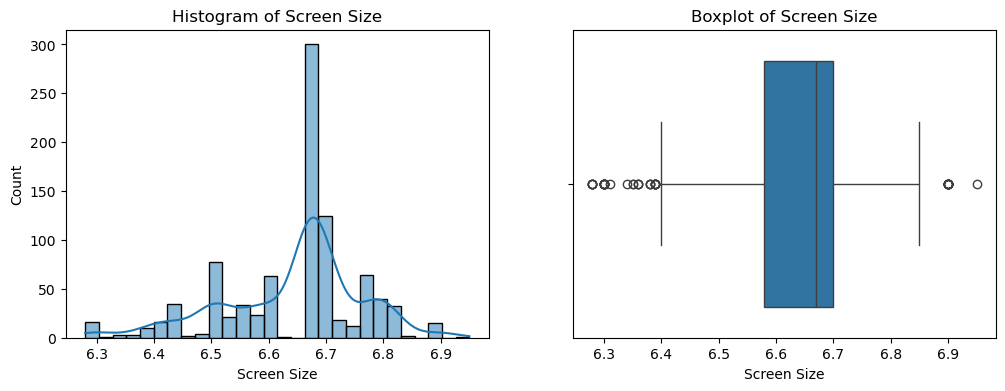

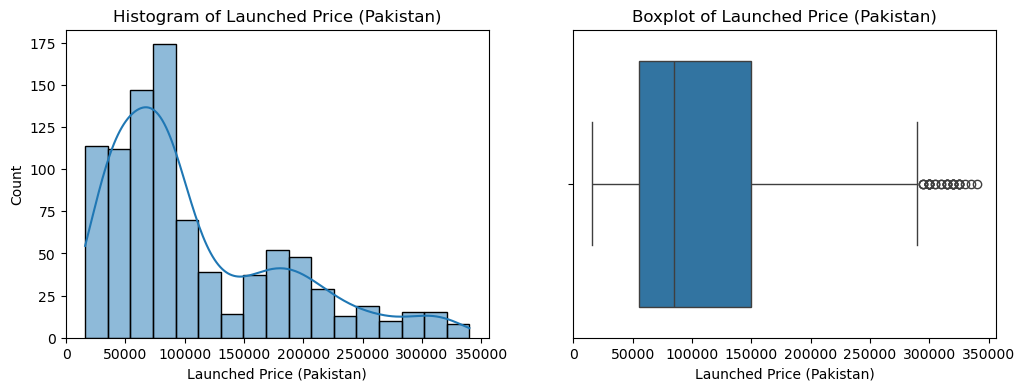

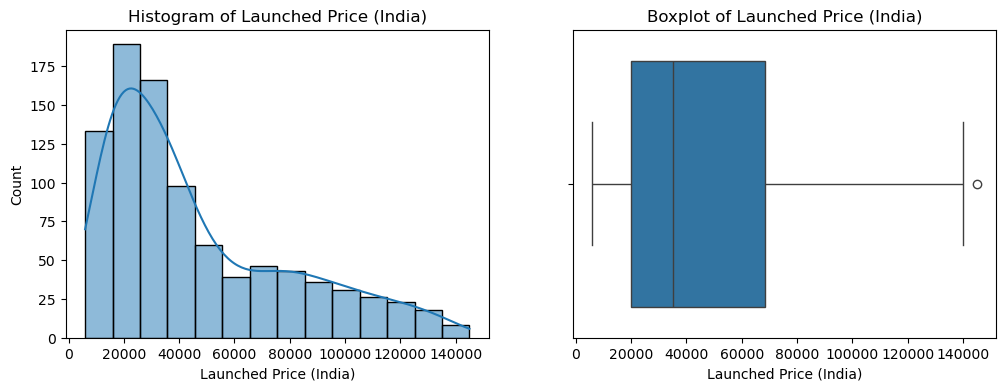

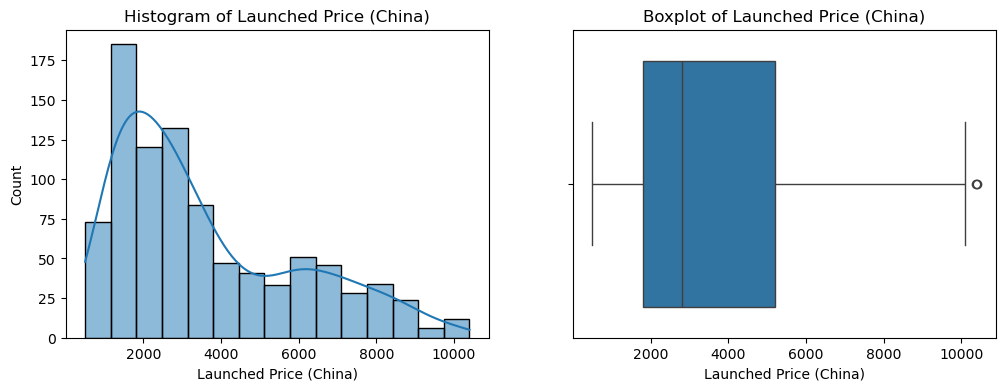

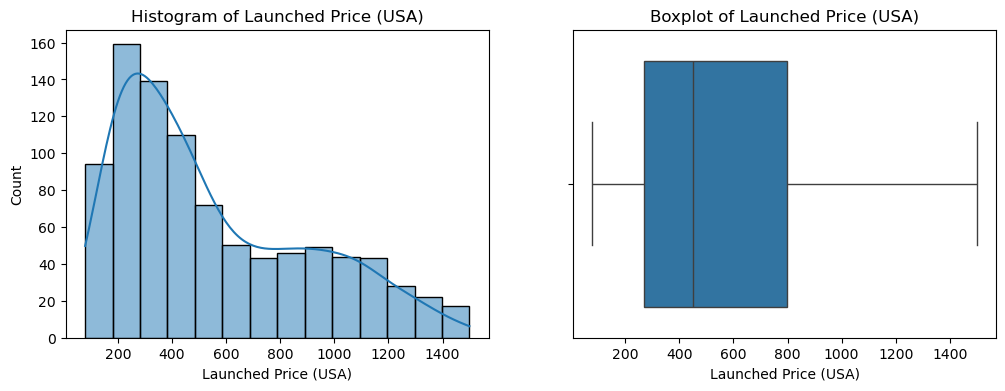

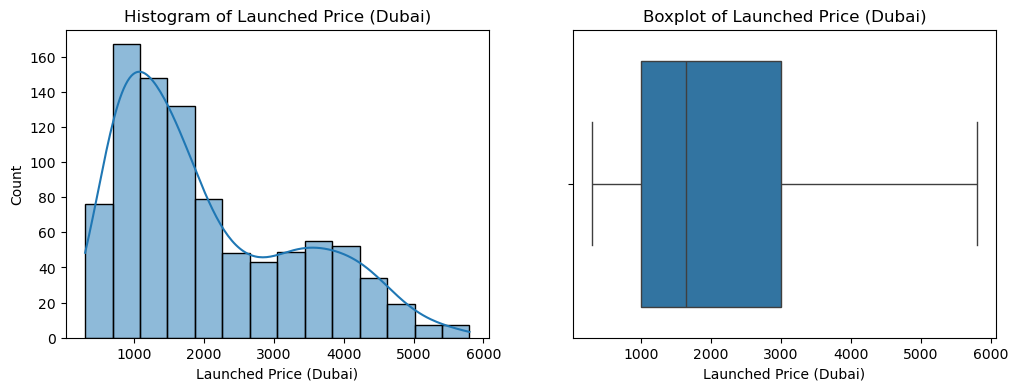

In [236]:
# UNIVARIATE ANALYSIS

print("Summary Statistics:")
print(df[numeric_cols].describe())
print("\nSkewness:")
print(df[numeric_cols].skew())

for col in categorical_cols:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts())

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()


<font size="4">BIVARIATE ANALYSIS</font>

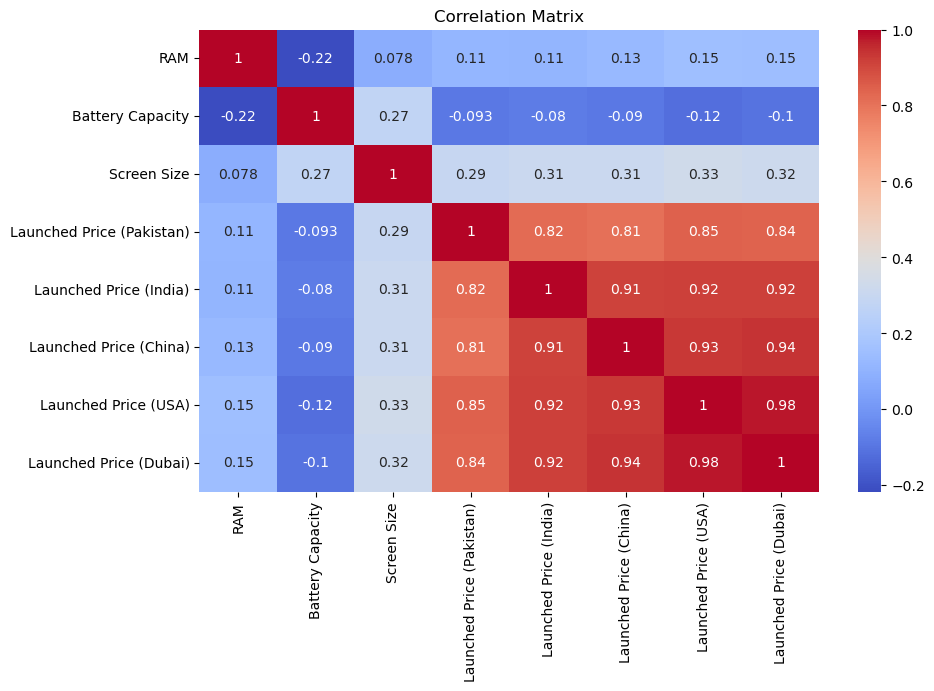

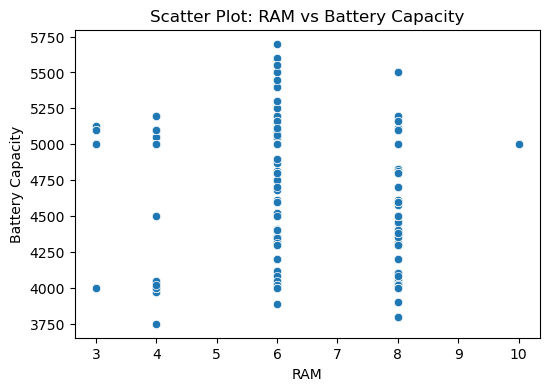

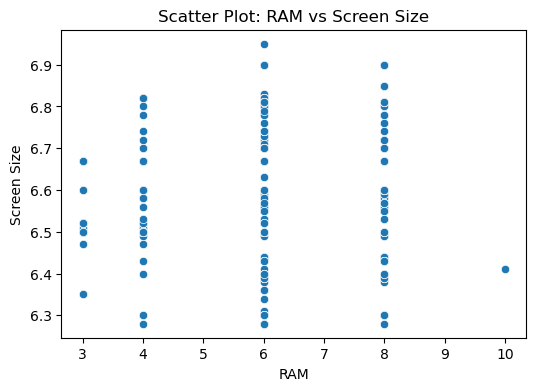

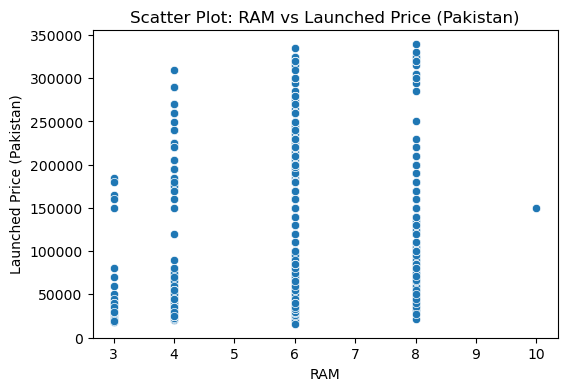

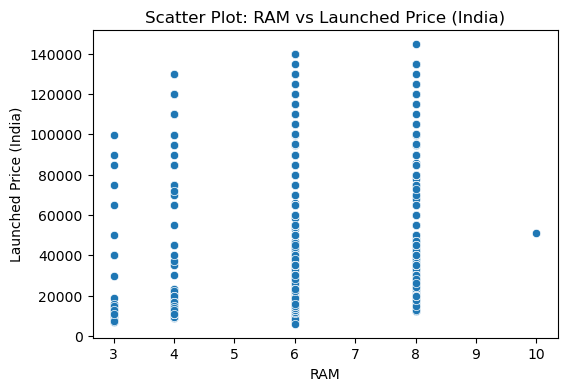

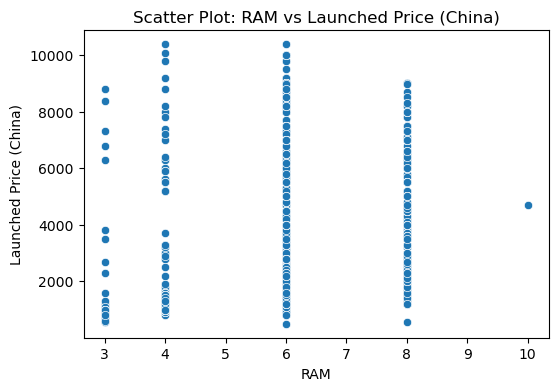

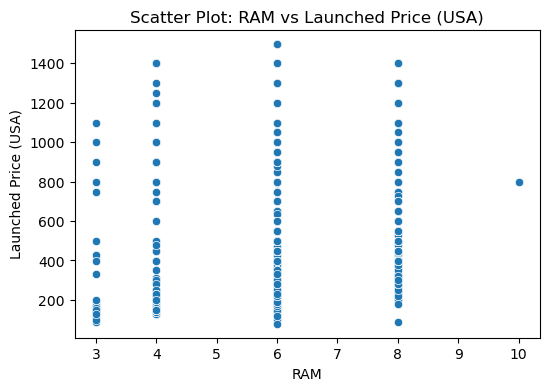

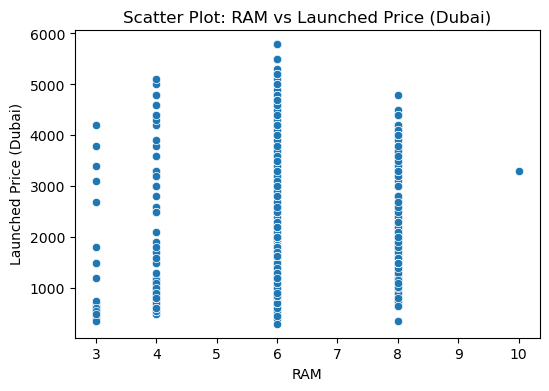

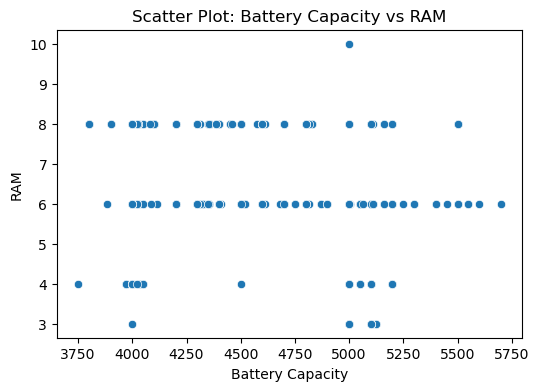

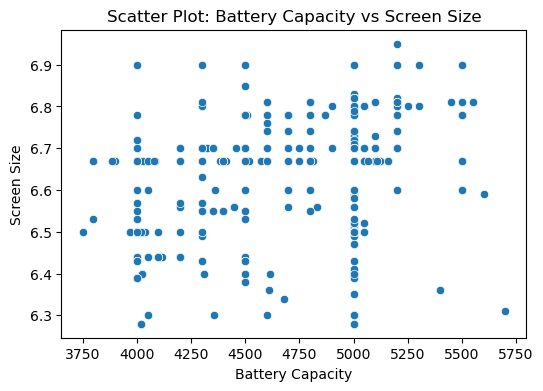

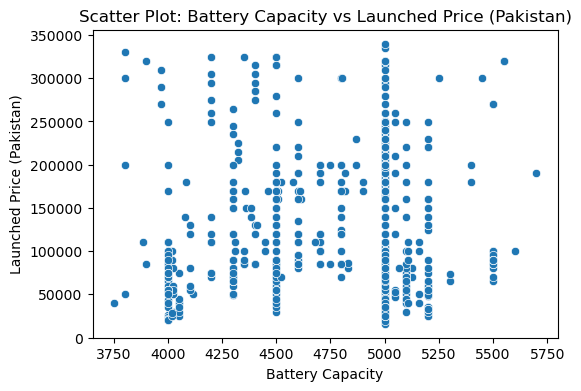

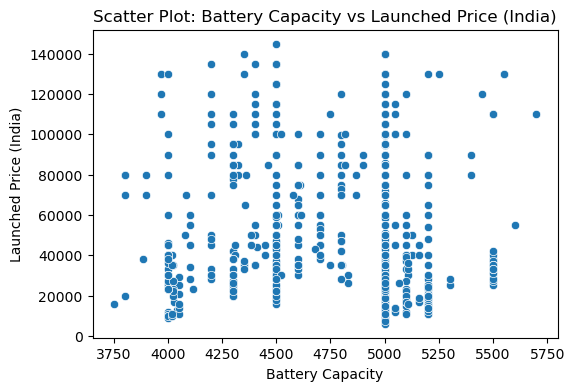

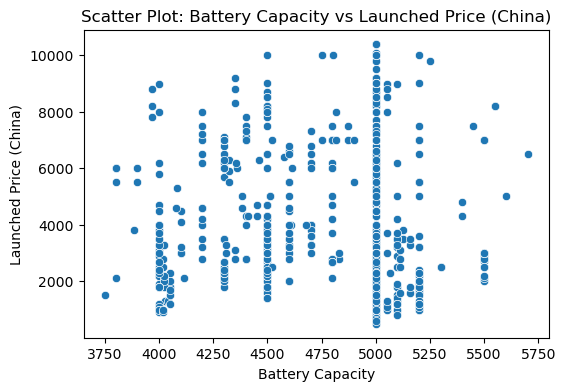

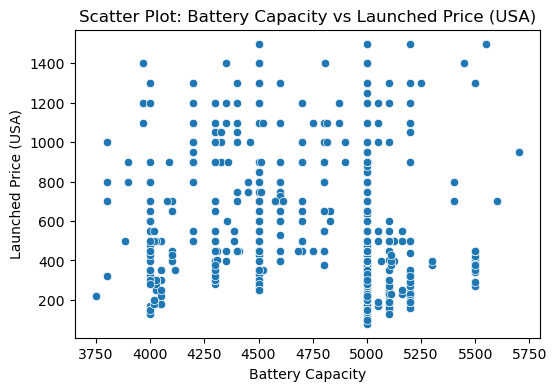

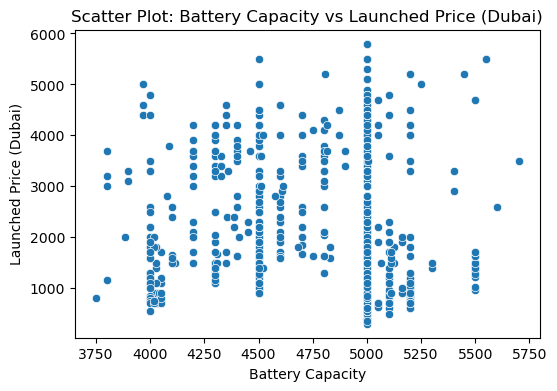

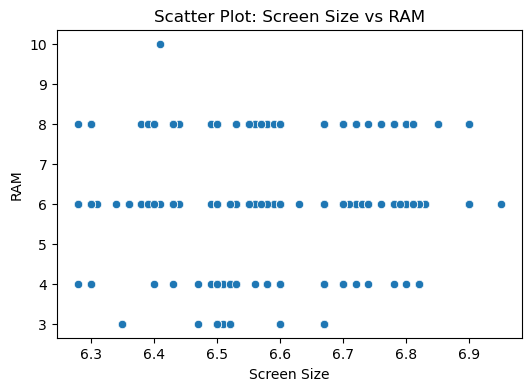

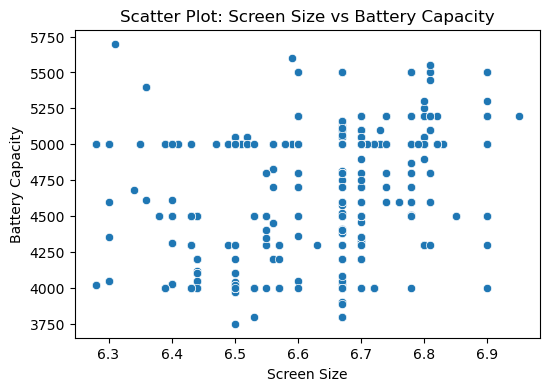

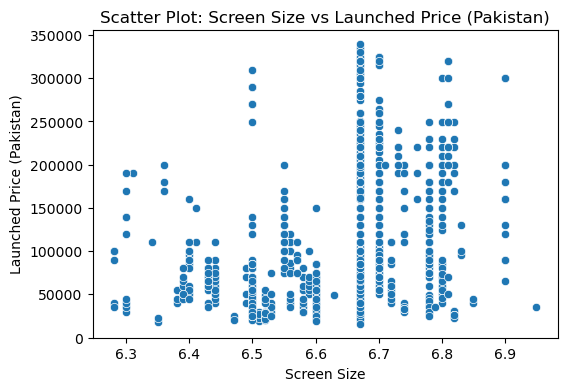

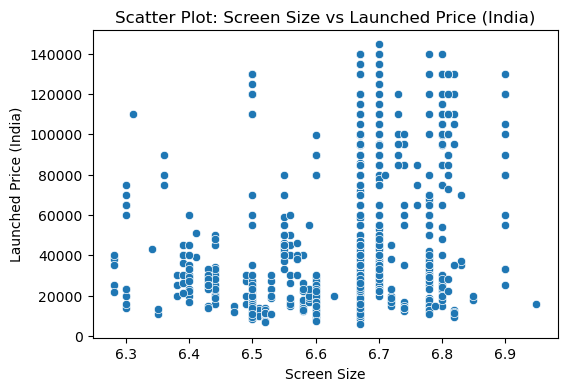

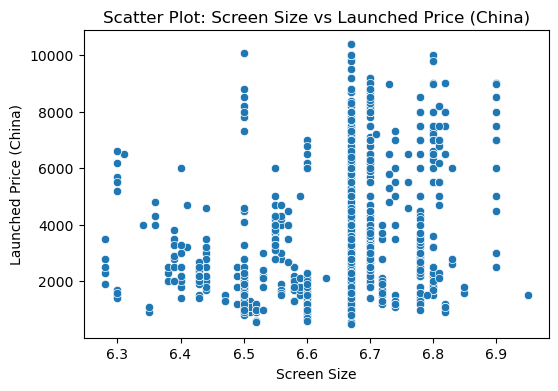

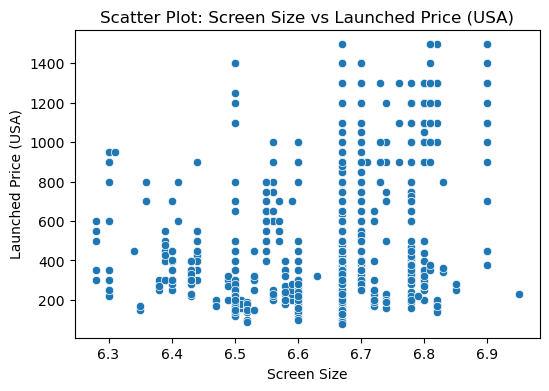

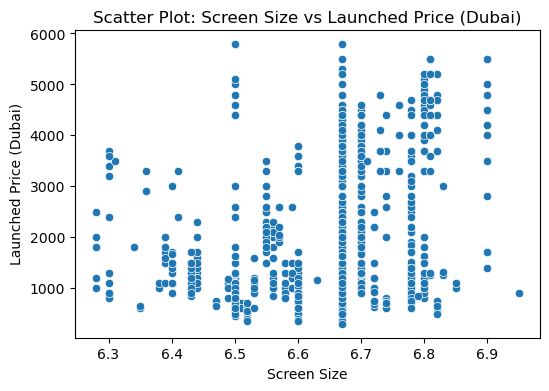

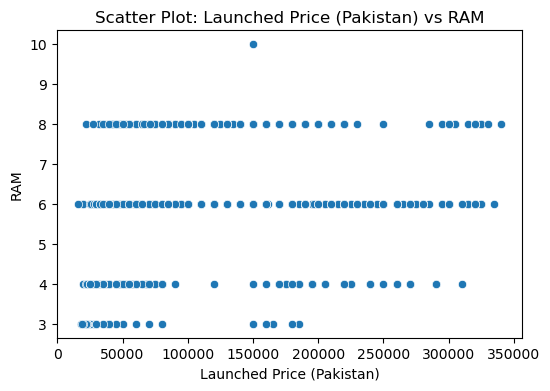

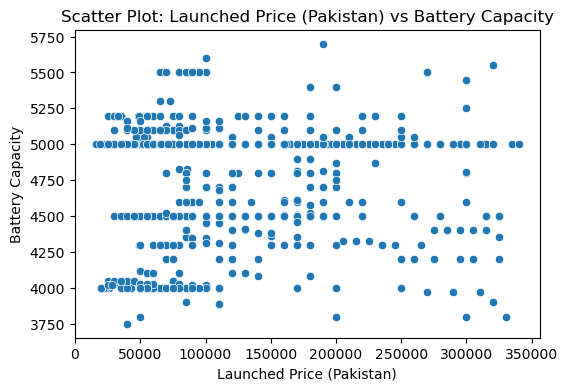

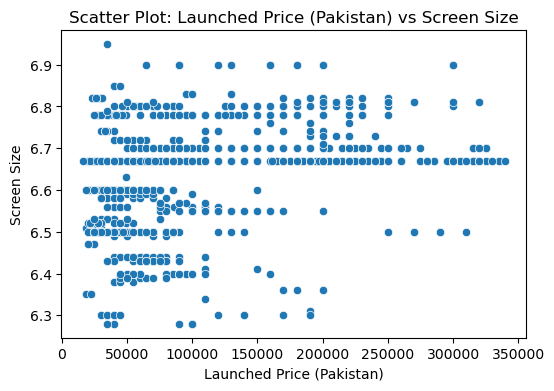

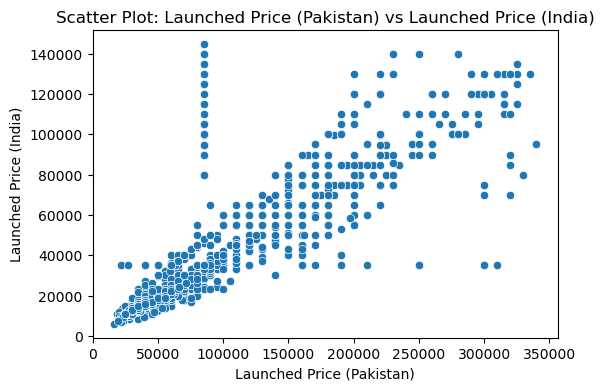

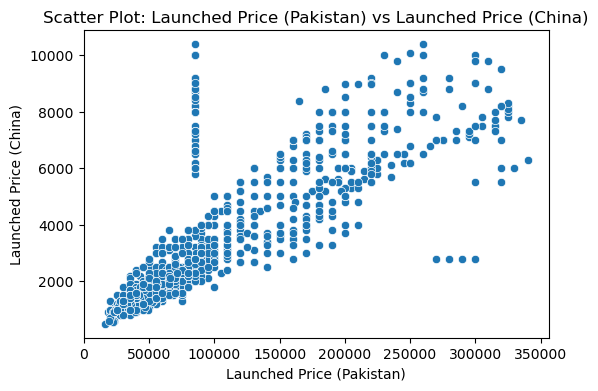

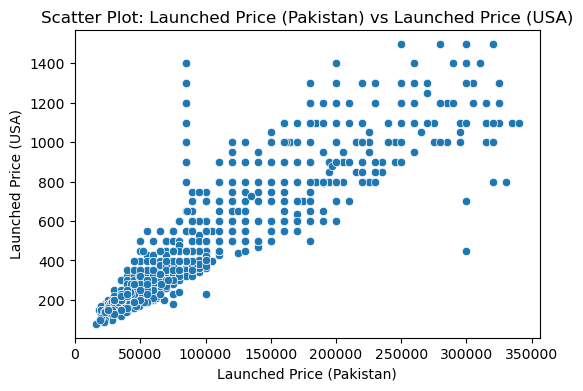

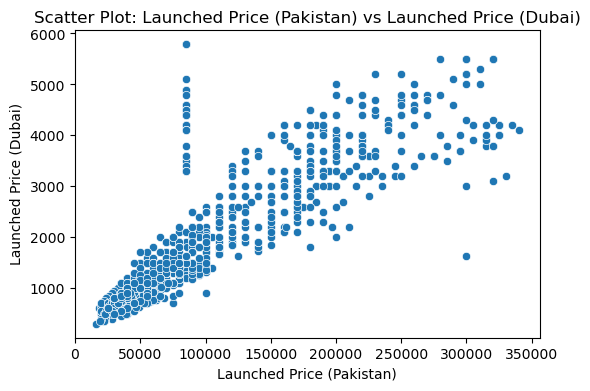

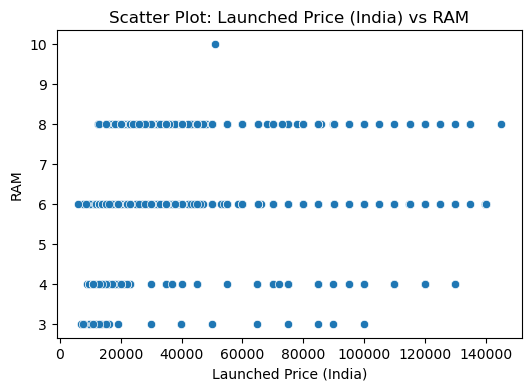

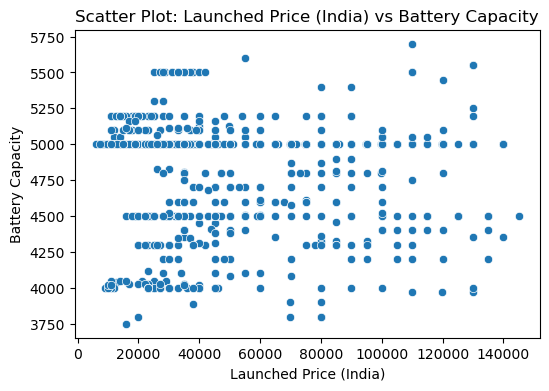

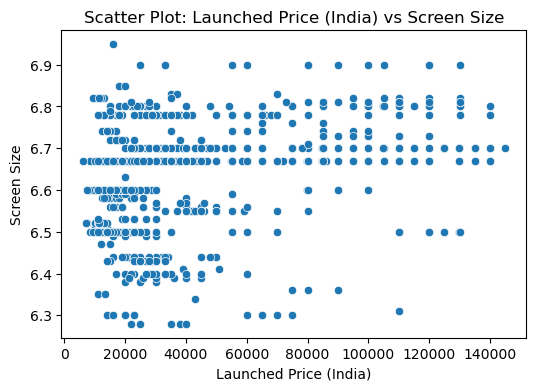

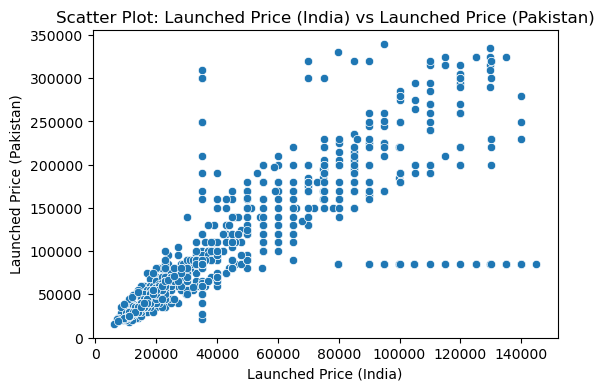

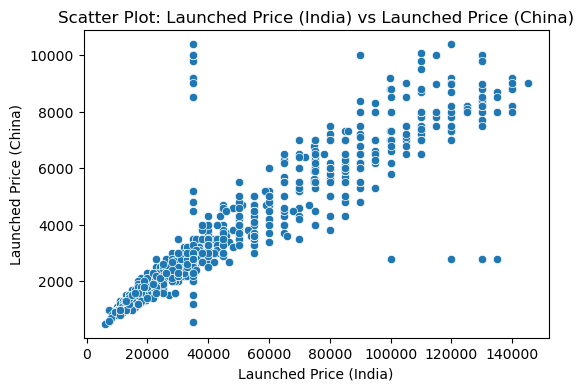

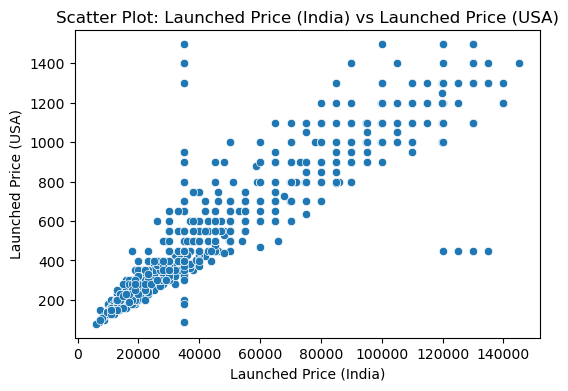

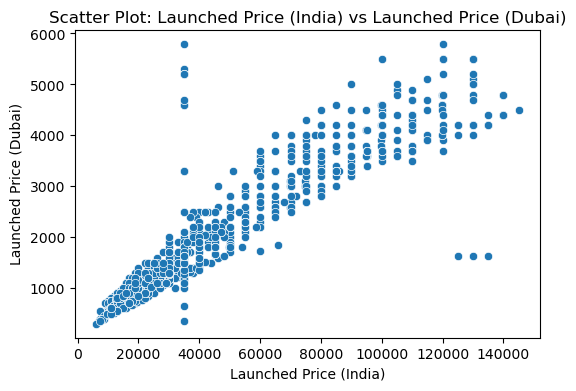

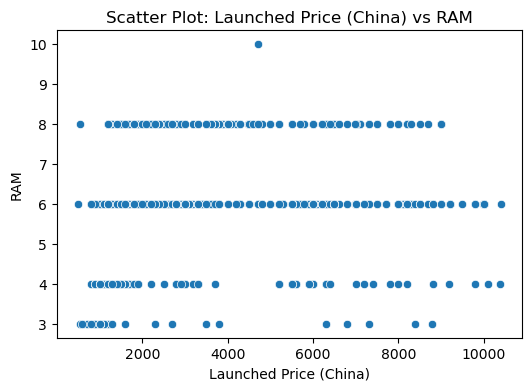

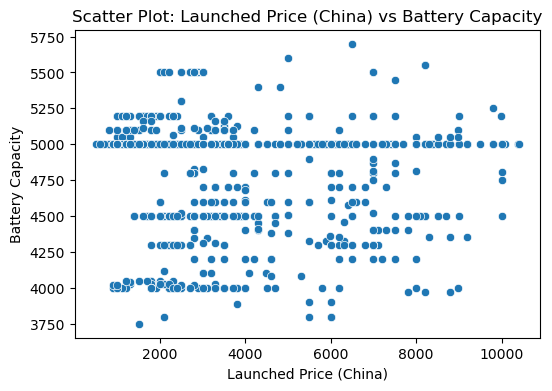

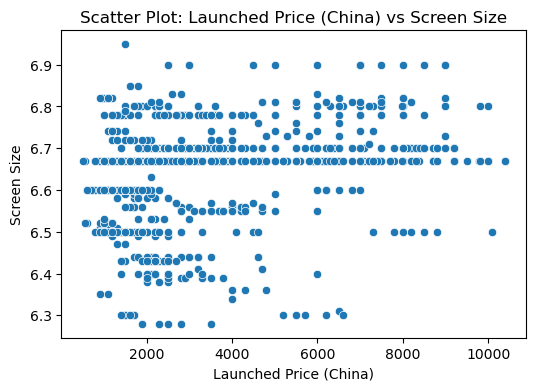

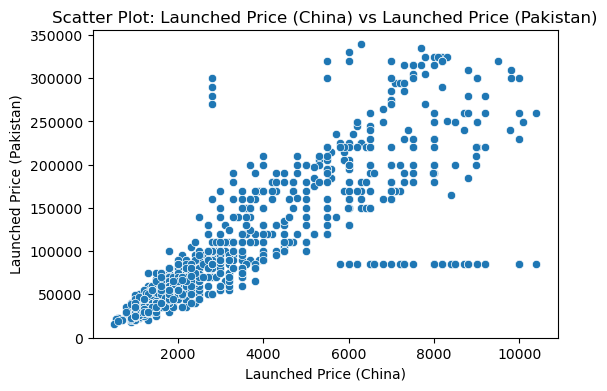

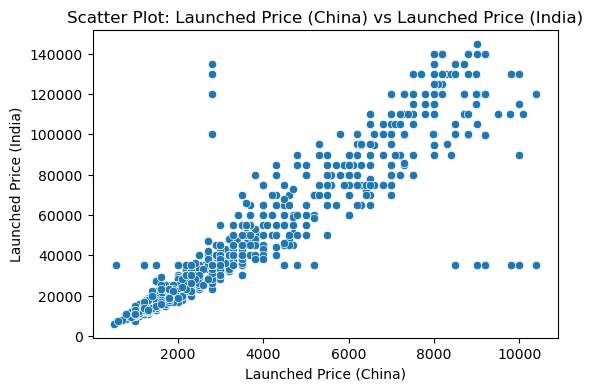

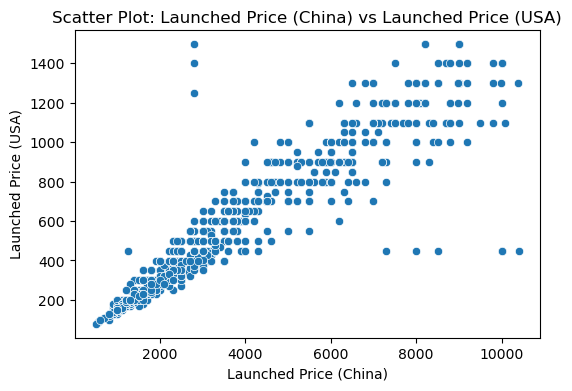

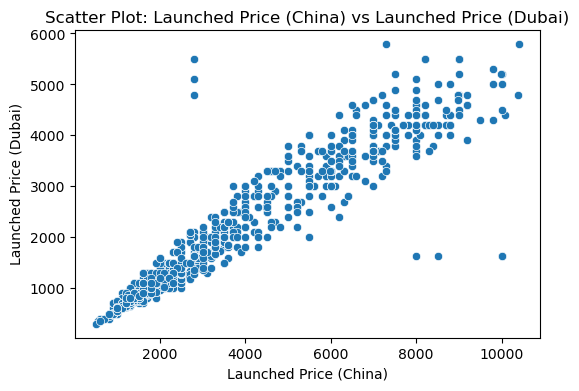

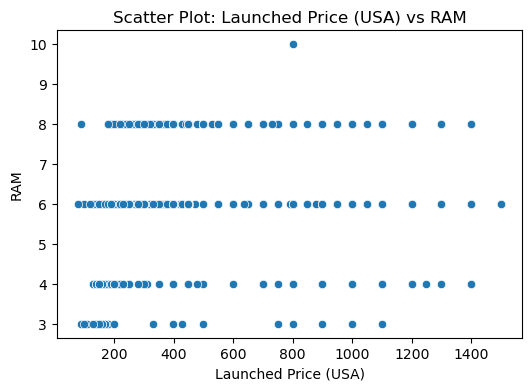

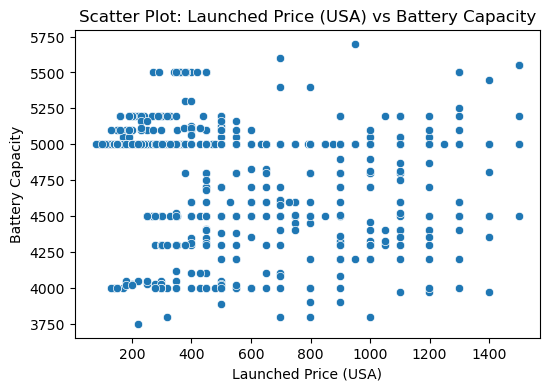

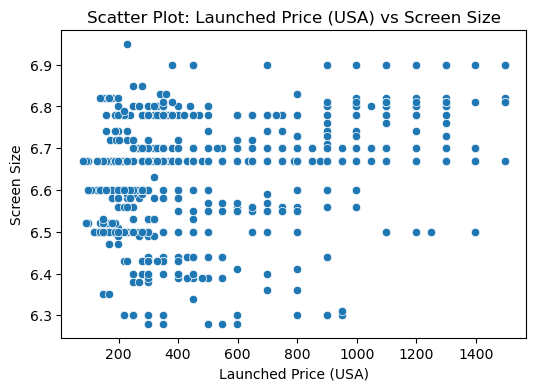

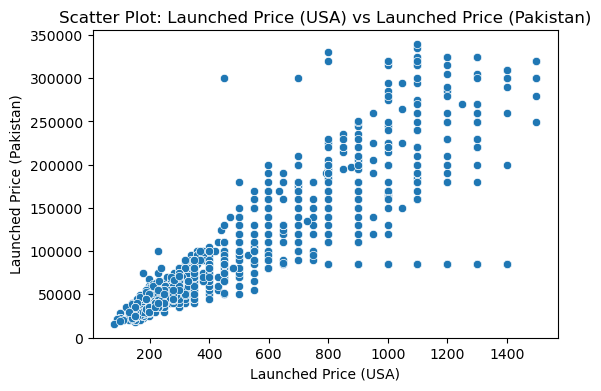

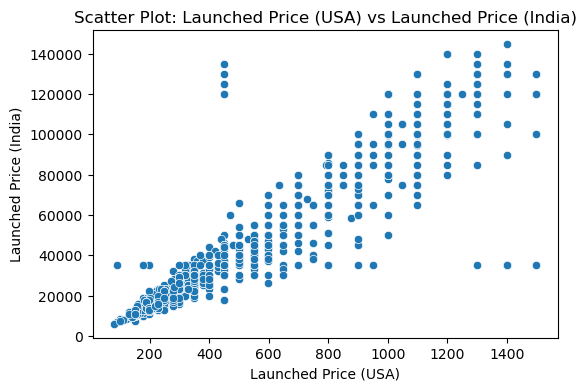

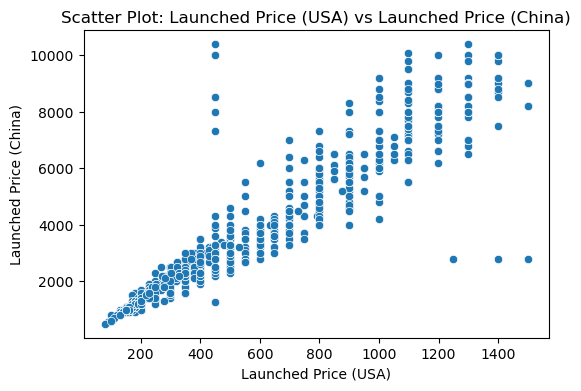

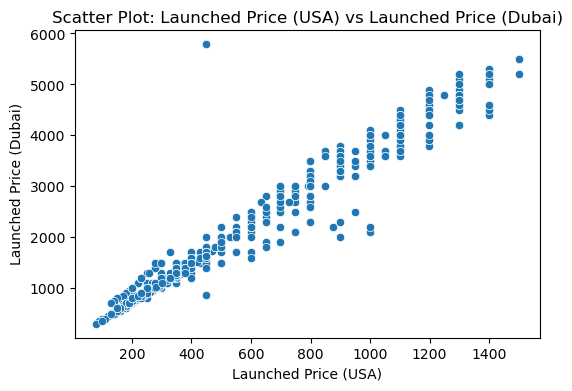

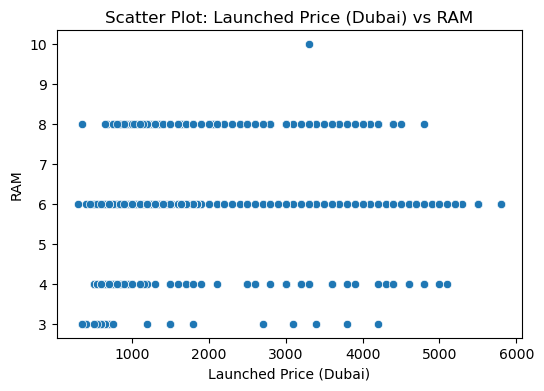

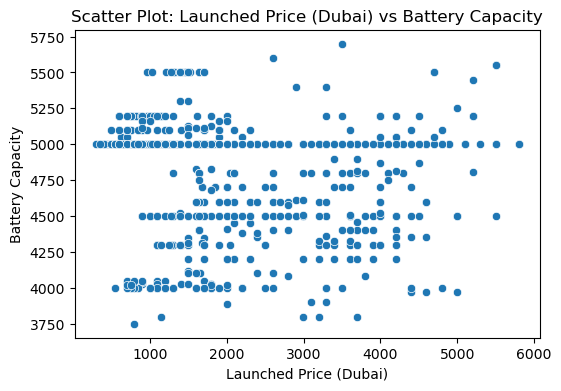

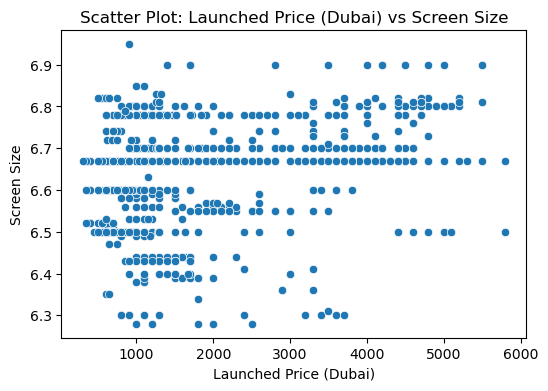

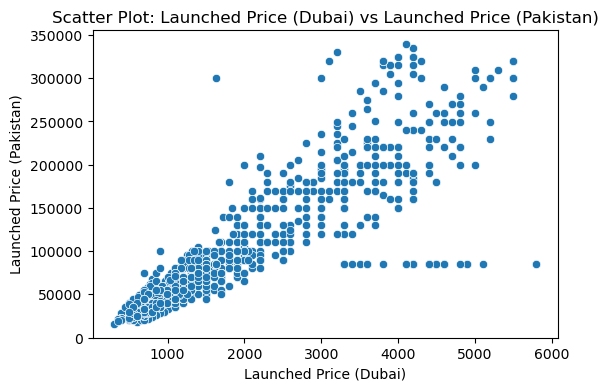

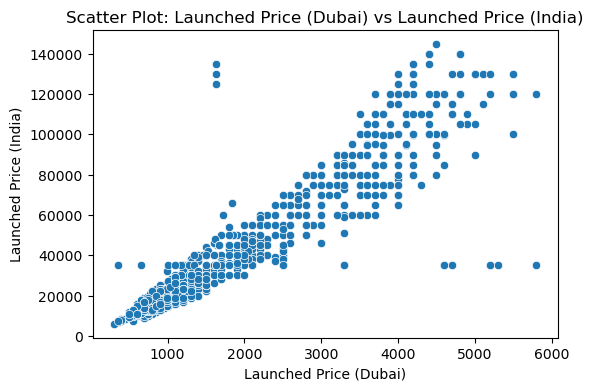

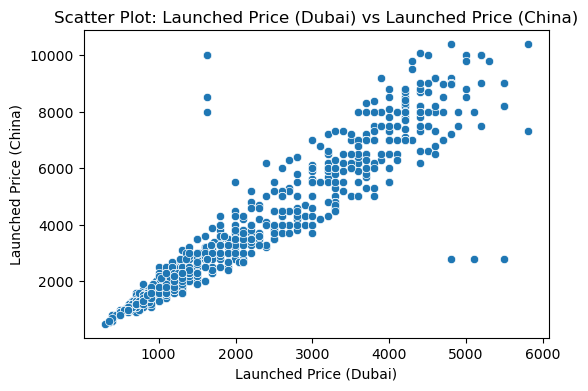

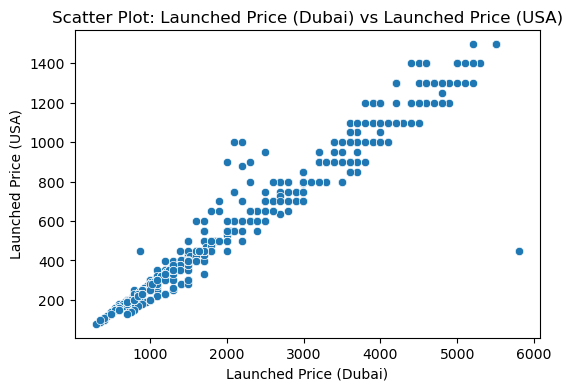

In [250]:
# BIVARIATE ANALYSIS

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f"Scatter Plot: {col1} vs {col2}")
            plt.show()

<font size="4">MULTIVARIATE ANALYSIS</font>

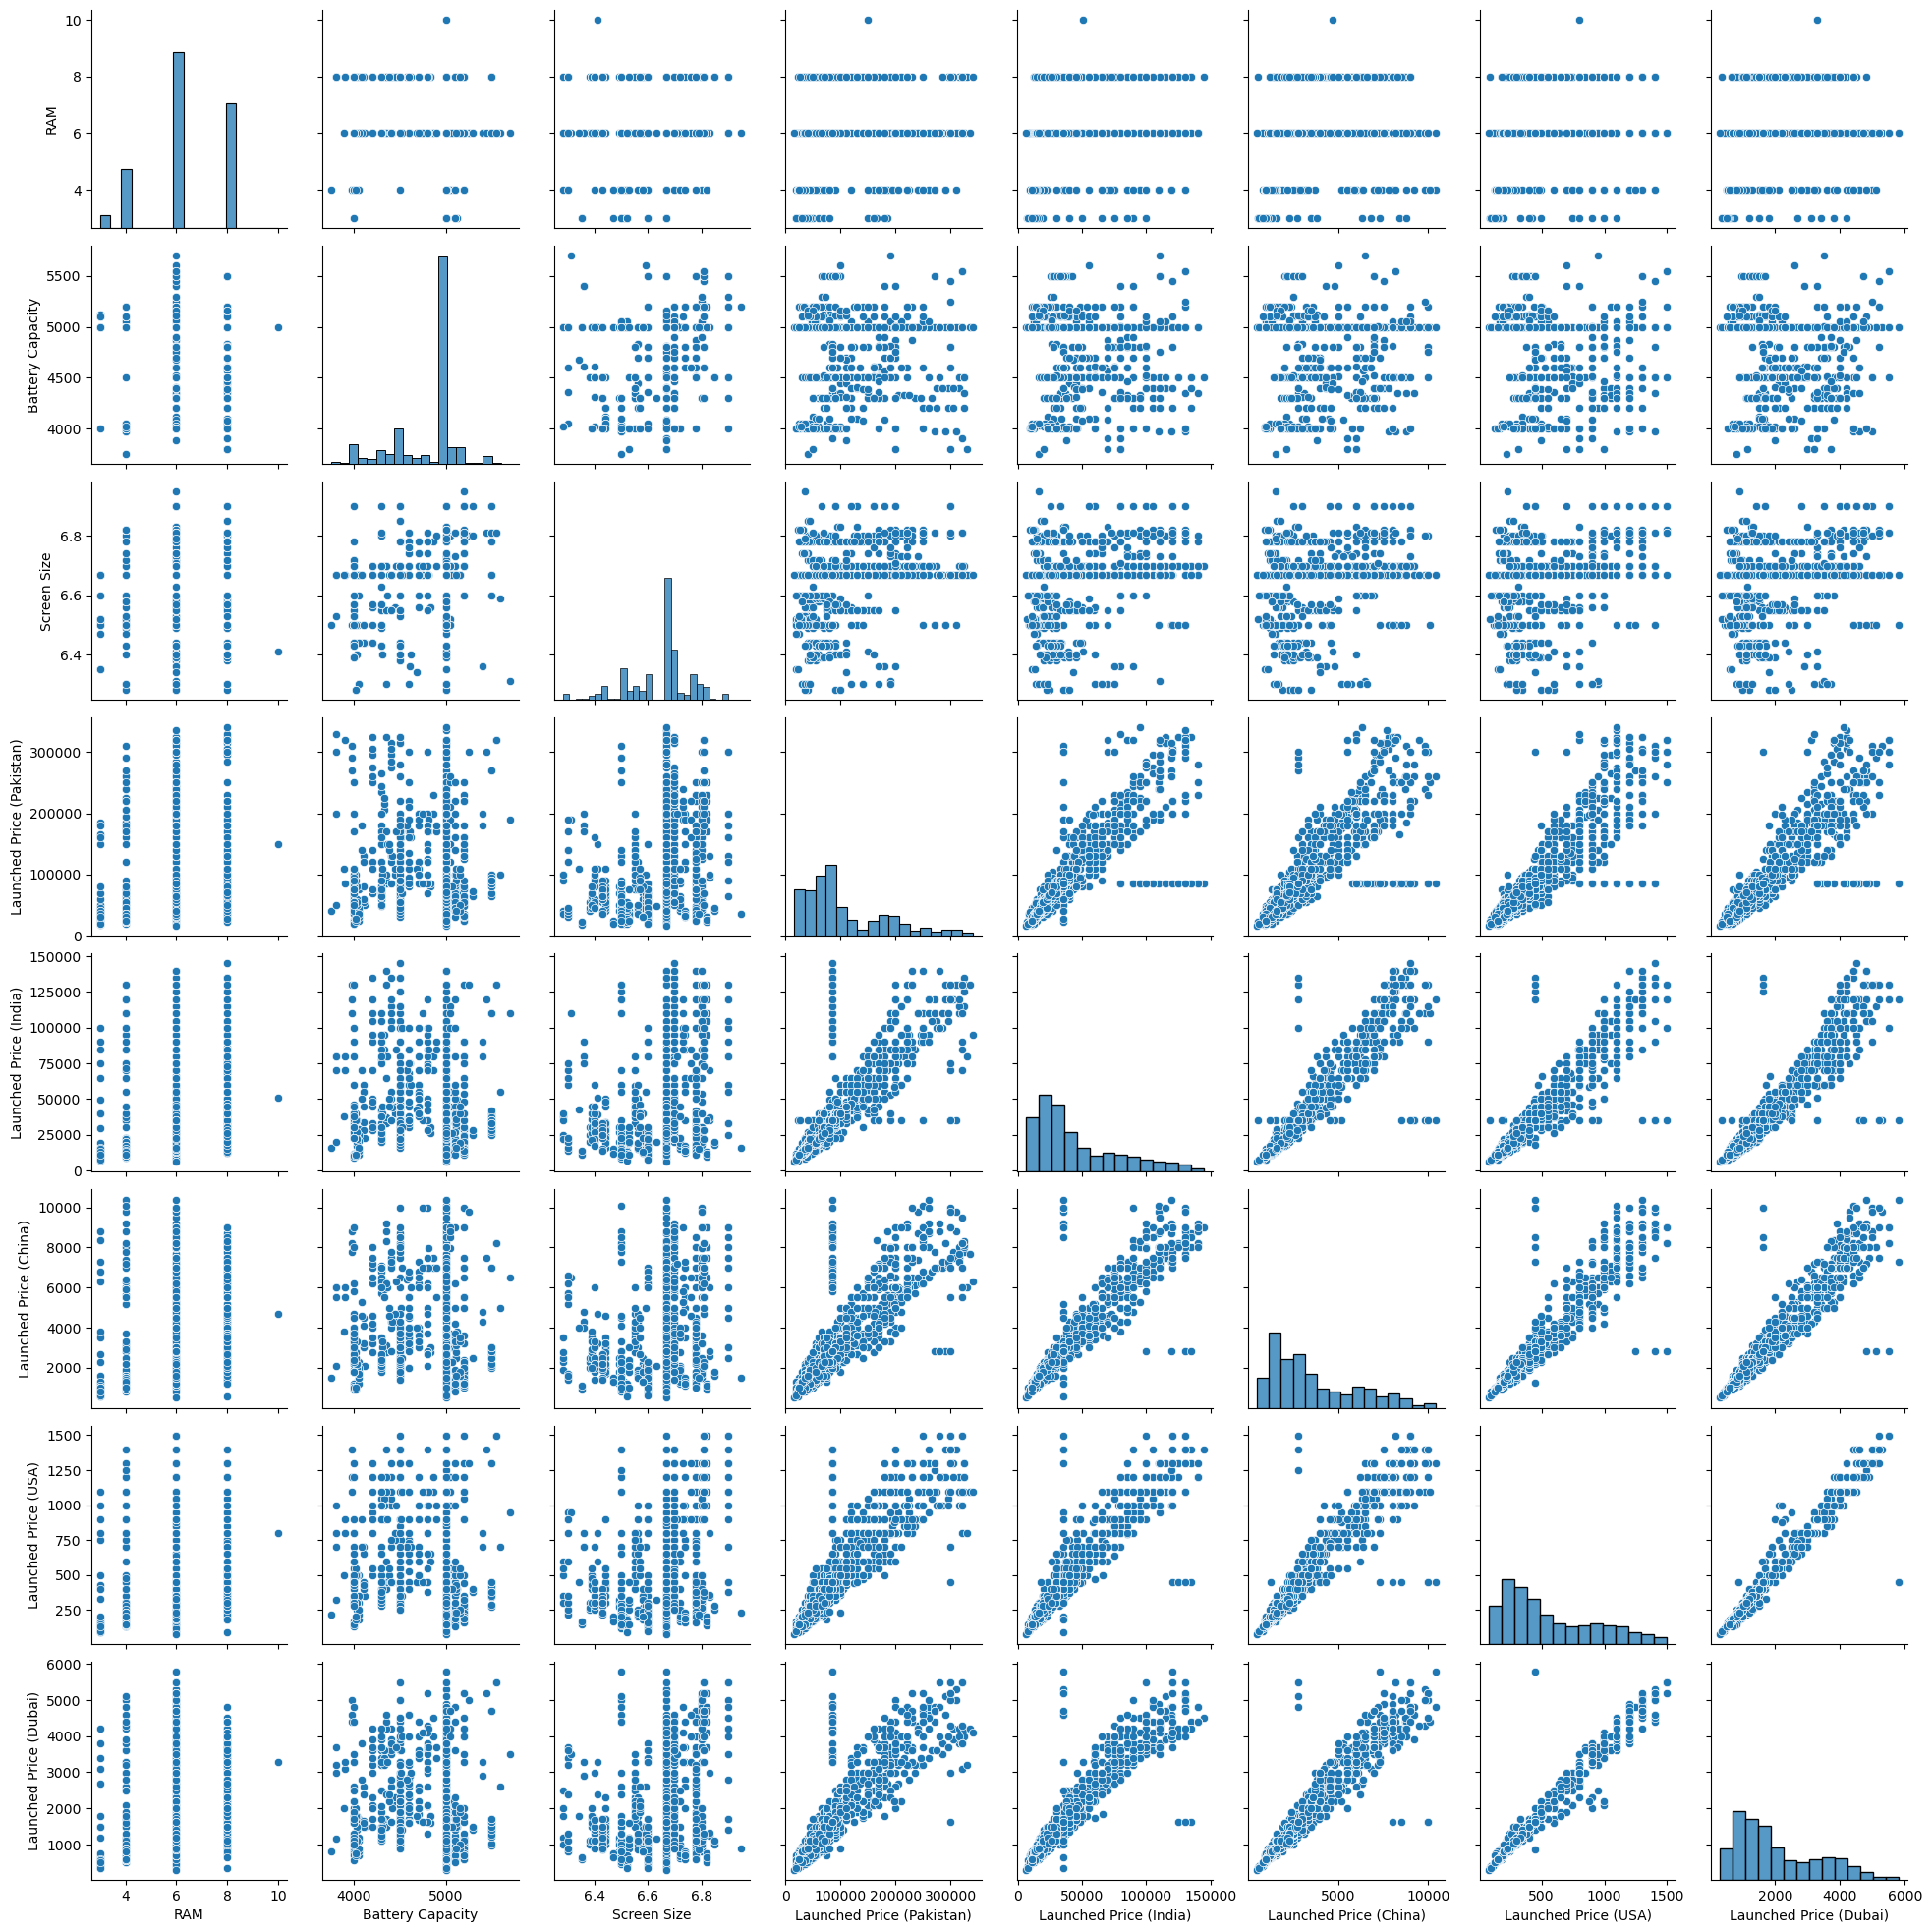

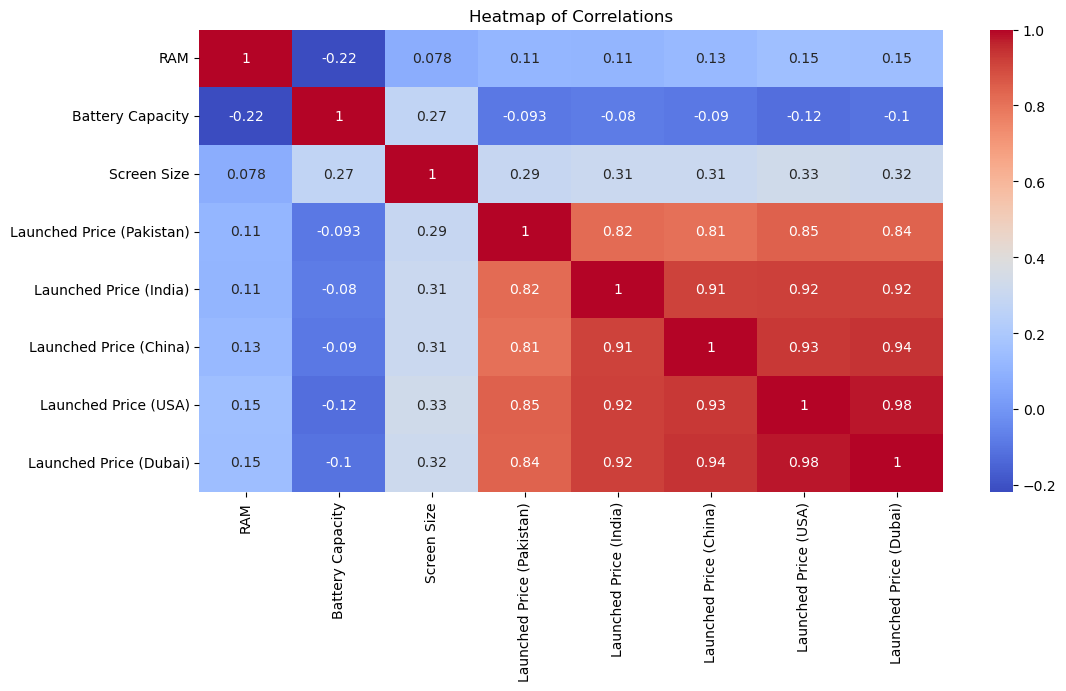

In [243]:
# MULTIVARIATE ANALYSIS

sns.pairplot(df[numeric_cols])
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlations")
plt.show()